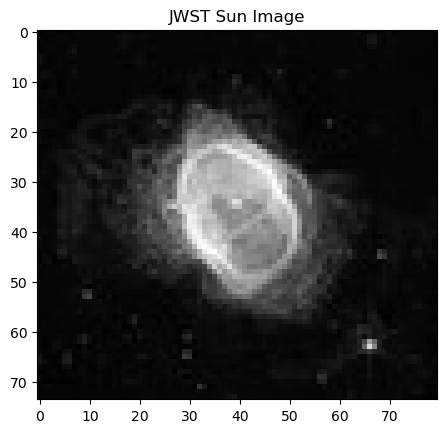

Sonification audio saved as 'right_5.wav'.


In [14]:
# Install necessary libraries
!pip install pydub numpy matplotlib pillow

# Import necessary libraries
from pydub import AudioSegment
from pydub.generators import Sine
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image (You can replace 'james1.png' with your image file path)
img = Image.open('right_5_JWST.png').convert('L')  # Convert to grayscale
pixels = np.array(img)

# Display the image
plt.imshow(pixels, cmap='gray')
plt.title("JWST Sun Image")
plt.show()

# Create an empty audio track (1 second of silence)
audio = AudioSegment.silent(duration=1000)

# Map pixel brightness to sound frequency (e.g., between 200Hz to 800Hz)
for i, row in enumerate(pixels):
    for j, brightness in enumerate(row):
        # Map pixel brightness (0-255) to sound frequency (200-800Hz)
        freq = np.interp(brightness, [0, 255], [200, 800])
        # Generate a short sine wave for each pixel (50 ms duration)
        sine_wave = Sine(freq).to_audio_segment(duration=50)
        # Append sine wave to audio with a slight crossfade
        audio = audio.append(sine_wave, crossfade=5)

# Export the audio to a WAV file
audio.export("right_5.wav", format="wav")

# Notify the user that the file has been saved
print("Sonification audio saved as 'right_5.wav'.")

